# 00. Домашнняя работа. Работа с датасетом

Импортирование полезных библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode()
%matplotlib inline

## 0.Описание задачи

Рассматриваемый датасет **Top 240 Recommended Restaurants in L.A. 2023** содержит 2381 тыс строк и 10 признаков:

1. `Rank` (NF) - Место в рейтинге самых рекомендуемых ресторанов Лос-Анджелеса
2. `CommentDate` (NF) - Дата написания комментария (отзыва о заведении)
3. `Date` (NF) - Дата сбора данных из интернета
4. `RestaurantName` (SF) - Название ресторана
5. `Comment` (SF) - Содержательние отзыва о ресторане
6. `Address` (SF) - Адрес заведения
7. `StarRating` (NF) - Средняя оценка посетителей ресторана
8. `NumberOfReviews` (NF) - Общее количество отзывов у заведения
9. `Style` (SF) - Тип кулинарии или вид блюд, предлагаемый рестораном
10. `Price` (CF) - Ценовая категория ресторана, обозначение используется в области структурированных данных, имеет 4 возможных значения: `$` - недорогое заведение, средний чек \$10 и меньше, `$$` - умеренно дорогое заведение, средний чек \$10-\$25, `$$$` - дорогое заведение, средний чек \$25-\$40, `$$$$` - очень дорогое заведение, средний чек \$50 и выше (URL https://www.cmsmax.com/faqs/misc/price-ranges forbidden for russian IP, use VPN)

NF - Numerical Features

CF - Categorical Features

BF - Binary Features

SF - String Features

Будем решать задачу регрессии, по некоторым обработанным признакам попробуем предсказать среднюю оценку ресторана.

## 1. Чтение данных

В exel таблице все значения в столбцах разделены с помощью запятой, что очень удобно для их считывания.

In [2]:
data = pd.read_csv("./top 240 restaurants recommanded in los angeles 2.csv", sep=",", engine="python")

In [3]:
data.head(10)

Rank CommentDate        Date RestaurantName  \
0     1  2023-09-16  2023-09-17      GRANVILLE   
1     1  2023-09-15  2023-09-17      GRANVILLE   
2     1  2023-09-07  2023-09-17      GRANVILLE   
3     1  2023-09-06  2023-09-17      GRANVILLE   
4     1  2023-09-05  2023-09-17      GRANVILLE   
5     1  2023-09-04  2023-09-17      GRANVILLE   
6     1  2023-09-03  2023-09-17      GRANVILLE   
7     1  2023-09-03  2023-09-17      GRANVILLE   
8     1  2023-08-31  2023-09-17      GRANVILLE   
9     1  2023-08-31  2023-09-17      GRANVILLE   

                                             Comment  \
0  Great ambiance indoors and attentive staff. Re...   
1  Wrong wrong wrong.   AIf you don't fit the Ty ...   
2  Bad service!! The worst servers. Marcos the ma...   
3  One of my absolute favorite places in WeHo for...   
4  Always a good experience and food is great.Tea...   
5  These five stars are for the food, service, an...   
6  Visited Granville for a quick lunch and had an...   
7  Great ambience, generous portions, delicious c...   
8  Food was fine. Follow up service was non exist...   
9  The food was fine and the ambiance was nice. O...   

                                      Address  StarRating  NumberOfReviews  \
0  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
1  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
2  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
3  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
4  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
5  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
6  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
7  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
8  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
9  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   

                           Style Price  
0  American (New), Cocktail Bars    $$  
1  American (New), Cocktail Bars    $$  
2  American (New), Cocktail Bars    $$  
3  American (New), Cocktail Bars    $$  
4  American (New), Cocktail Bars    $$  
5  American (New), Cocktail Bars    $$  
6  American (New), Cocktail Bars    $$  
7  American (New), Cocktail Bars    $$  
8  American (New), Cocktail Bars    $$  
9  American (New), Cocktail Bars    $$

Всего в таблице содержатся данные о 2381 комментариях о 240 самых рекомендуемых ресторанах Лос-Анджелеса.

In [4]:
data.shape

(2381, 10)

In [5]:
data.columns

Index(['Rank', 'CommentDate', 'Date', 'RestaurantName', 'Comment', 'Address',
       'StarRating', 'NumberOfReviews', 'Style', 'Price'],
      dtype='object')

In [6]:
len(data["RestaurantName"].unique())

235

В датасете представленны данные только по 235 ресторанам, а не 240 как это было заявленно. По видимому сбор данных с интернета авторами датасета был произведен недостаточно корректно.

## 2. Визуализация данных

Выведем информацию о количестве непустых значений, среднем, среднем разбросе, и пороговые значения в каждом столбце

In [7]:
desc_stats = data.describe(exclude=['O'])
desc_stats

Rank   StarRating  NumberOfReviews
count  2381.000000  2381.000000      2381.000000
mean    120.173457     4.304662      1141.541369
std      68.925564     0.312753      1531.834833
min       1.000000     3.500000         2.000000
25%      61.000000     4.100000       129.000000
50%     119.000000     4.300000       518.000000
75%     180.000000     4.500000      1623.000000
max     240.000000     5.000000     10020.000000

In [8]:
desc_stats = data.describe(include=['O'])
desc_stats

CommentDate        Date RestaurantName  \
count         2381        2381           2381   
unique         206           1            235   
top     2023-09-10  2023-09-17   Sun Nong Dan   
freq           128        2381             20   

                                                  Comment  \
count                                                2381   
unique                                               2381   
top     Great ambiance indoors and attentive staff. Re...   
freq                                                    1   

                     Address   Style Price  
count                   2371    2381  1745  
unique                   233     197     3  
top     Verified by Business  Korean    $$  
freq                      29      65  1256

В данных присутствуют рестораны с рейтингом 1 и 240. Отсуствующие рестораны имеют промежуточный рейтинг.

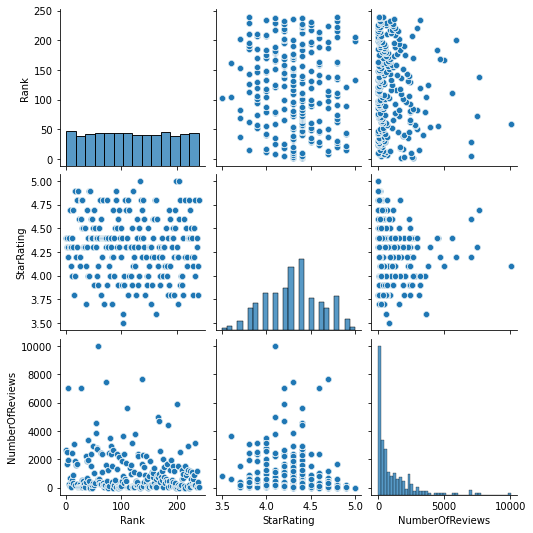

In [9]:
sns.pairplot(data)

+ Как правило, рестораны с высокой средней оценкой имеют большее число отзывов

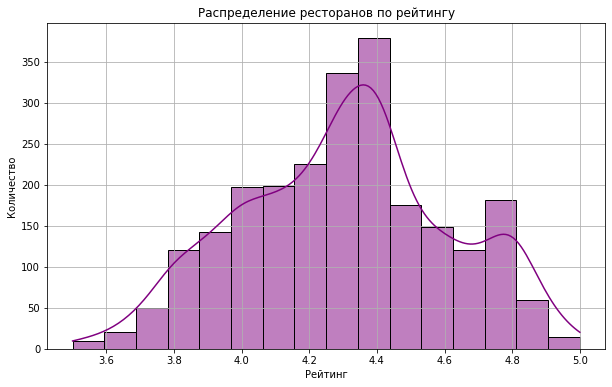

In [10]:
# Plotting distribution of StarRating
plt.figure(figsize=(10, 6))
sns.histplot(data['StarRating'], kde=True, bins=16, color="purple", fill=True)
plt.title('Распределение ресторанов по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

+ Легко заметить, что большинство ресторанов имеет рейтинг от 4.0 до 4.5

In [11]:
data_plot = data.groupby('RestaurantName')['StarRating'].mean().reset_index().sort_values(by="StarRating", ascending=False).head(10)

fig = px.bar(data_plot, x='RestaurantName', y='StarRating',
             title='Top 10 Restaurants',
             labels={'RestaurantName': 'RestaurantName', 'StarRating': 'StarRating'},
             color='RestaurantName')
fig.update_yaxes(range=[4.7, 5.1])
fig.show()

+ Наивысшую оценку 5 имеют такие рестораны как Reunion Hollywood, Manse Korean Buffet и Lui's Cafe

In [12]:
data_plot = data.groupby('RestaurantName')['NumberOfReviews'].count().reset_index().sort_values(by="NumberOfReviews", ascending=False).head(10)
fig = px.bar(data_plot, x='RestaurantName', y='NumberOfReviews',
             title='Top 10 Restaurant by Number of reviews',
             labels={'RestaurantName': 'RestaurantName', 'NumberOfReviews': 'NumberOfReviews'},
             color='RestaurantName') # NumberOfReviews StarRating
fig.show()

+ Наибольшее число отзывов имеет ресторан Perch. Легко заметить, что он не входит в список самых высоко оценненных заведений

In [13]:
data_plot = data.groupby('StarRating')["NumberOfReviews"].count().reset_index()

fig = px.bar(data_plot, x='StarRating', y='NumberOfReviews',
             title='Распределение ресторанов по рейтингу',
             labels={'StarRating': 'Star Rating', 'NumberOfReviews': 'Number Of Reviews'},
             color='NumberOfReviews') # NumberOfReviews StarRating
fig.show()

+ наибольшее количество отзывов приходится на рестораны с оценкой 4.4, в то время как наименьшее приходится на заведения с оценками 3.5 и 5, которые являются минимальными и максимальными оценками соотвественно. Выбросов нет.

In [14]:
data_plot = data.copy()
data_plot['Style'] = data_plot['Style'].str.split(',')
data_exploded = data_plot.explode('Style', ignore_index=True)
df_style_most = data_exploded['Style'].str.strip().value_counts().reset_index()
df_style_most.columns = ['Style', 'Count']
df_style_most = df_style_most.sort_values(by='Count', ascending=False).head(10)

fig = px.bar(df_style_most, x='Style', y='Count',
             title='Top 10 Styles by Number of reviews',
             labels={'Style': 'Style', 'Count': 'Count'},
             color='Style')
fig.show()

+ Наибольшее число комментариев относятся к ресторанам Новой Американской кухни, Корейской кухни, а также Коктейльным Барам, отличительной чертой которых является создание своих фирменных алкогольных коктелей.

In [15]:
mean_StarRating = data_exploded.copy()
mean_StarRating["Style"] = mean_StarRating["Style"].str.strip()
mean_StarRating = mean_StarRating.groupby('Style')['StarRating'].mean().reset_index().sort_values(by="StarRating", ascending=False)
mean_StarRatingPlot = mean_StarRating.head(10)

fig = px.bar(mean_StarRatingPlot, x='Style', y='StarRating',
             title='Relationship between StarRating and Style',
             labels={'Style': 'Elements in StarRating', 'Count': 'Mean of StarRating'},
             color='Style')
fig.update_yaxes(range=[4.5, 5])
fig.show()

+ Наиболее высокую оценку имеют рестораны Лаосской кухни, заведения, представляющие из себя просто стойку с едой на улице (что любопытно), а также заведения имеющие в своем меню фирменные блюда

In [16]:
data_plot = data.copy()
data_plot = data_plot[data_plot['Price'].notna() & (data_plot['Price'] != float('inf'))]
# data_plot["Price2"] = data_plot.Price.str.count("\$").astype(int)
data_plot['CommentDate'] = pd.to_datetime(data_plot['CommentDate'])
data_plot.set_index('CommentDate', inplace=True)
df_resampled = data_plot.resample('D').size().reset_index(name='Number of Comments')
fig = px.line(df_resampled, x='CommentDate', y='Number of Comments', title='Number of Comments Over Time',
              labels={'CommentDate': 'Comment Date', 'Number of Comments': 'Number of Comments'})
fig.show()

+ При сборе датасета авторы брали 10 самых недавних отзывов. Таким образом, самый ранний из отзывов, оставленных к ресторанам, датируется декабрем 2012 года.

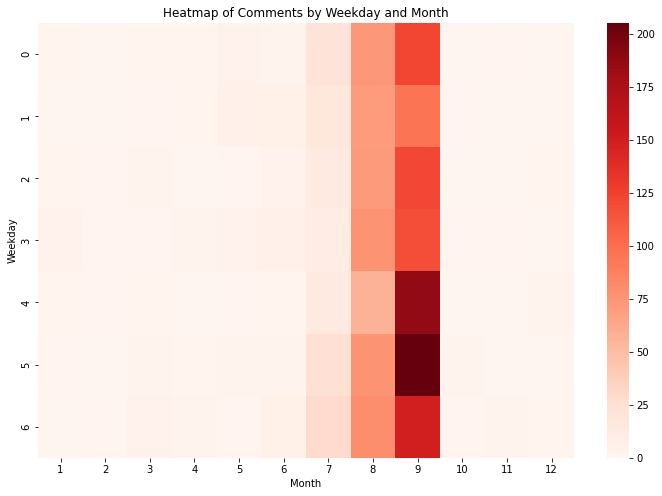

In [17]:
data_plot['Weekday'] = data_plot.index.weekday
data_plot['Month'] = data_plot.index.month
plt.figure(figsize=(12, 8))
heatmap_data = data_plot.groupby(['Weekday', 'Month']).size().unstack()
heatmap_data = heatmap_data.fillna(0).astype(int)
sns.heatmap(heatmap_data, cmap="Reds")
plt.title('Heatmap of Comments by Weekday and Month')
plt.show()

+ Чаще всего люди оставляли отзывы в пятницу. Вероятно, это связано с тем, что люди чаще ужинают вне дома в пятницу вечером

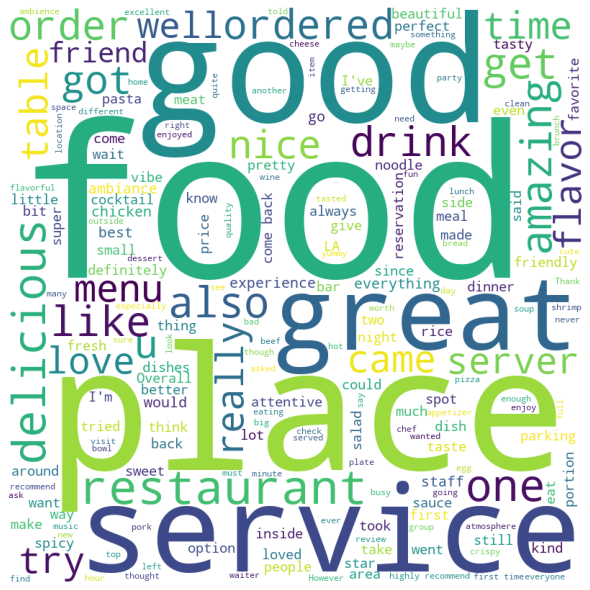

In [18]:
from wordcloud import WordCloud

text = " ".join(x for x in data["Comment"])
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords=STOPWORDS,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

+ положительные слова встречаются крайне часто

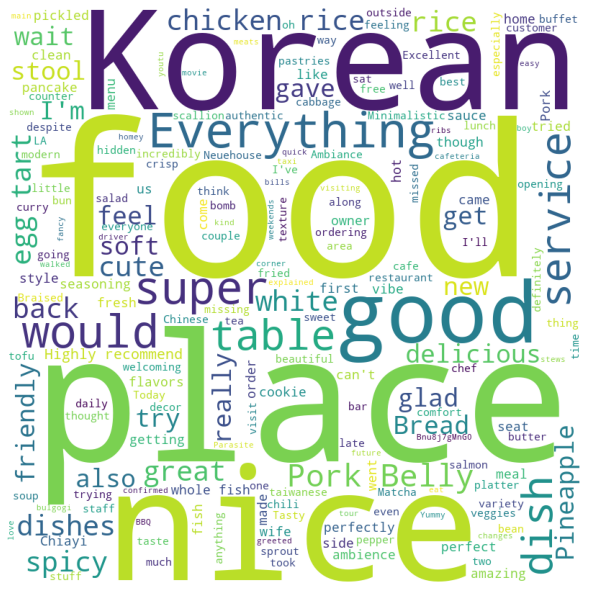

In [19]:
text = " ".join(x for x in data["Comment"][(data["StarRating"] == 5)])
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords=STOPWORDS,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

+ В комментариях к ресторанам с высокой оценкой можно найти частое употребление конкретных блюд

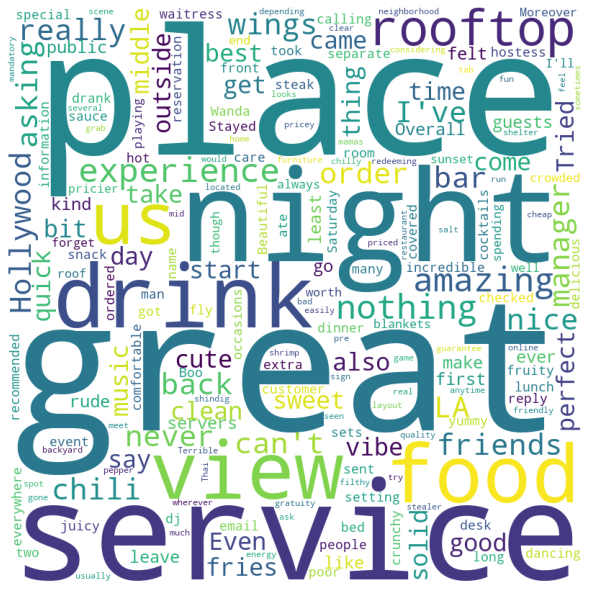

In [20]:
text = " ".join(x for x in data["Comment"][(data["StarRating"] == 3.5)])
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords=STOPWORDS,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

+ В то же время в комментариях к ресторанам с низкой оценкой можно обнаружить частое упоминание слов ночь и напитки. Интересно :)

In [21]:
corr_mat = data.corr(numeric_only=True)
corr_mat

Rank  StarRating  NumberOfReviews
Rank             1.000000   -0.104324        -0.142290
StarRating      -0.104324    1.000000        -0.176688
NumberOfReviews -0.142290   -0.176688         1.000000

<Axes: >

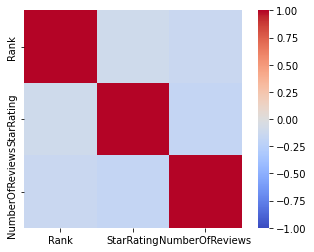

In [22]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmax=1.0, vmin=-1.0)

+ Коррелирующих признаков нет

## 3. Рассмотрение пропущенных значений

In [23]:
data.isna().sum()

Rank                 0
CommentDate          0
Date                 0
RestaurantName       0
Comment              0
Address             10
StarRating           0
NumberOfReviews      0
Style                0
Price              636
dtype: int64

Пропущенные значения имеются в таких признаках, как `Address` и `Price`. В случае с `Adress` пропущенные значения состовляют несущественную часть (меньше 1%) от общего числа. К тому же заменить этот признак чем-нибудь не разумно, поэтому просто удалим соотвествующие строки. В случае с `Price` пропущенные значения состовляют существенную часть (около 23%) от общего числа. Так же не разумно удалить эти признаки совсем, в том числе потому что в них заложена полезная информация, которая может пригодиться для дальнейшей работы. Размно заменить значения значением моды, так как это категориальный признак.

In [24]:
data["Price"].fillna(data["Price"].mode().iloc[0], inplace=True)
data = data.dropna()
data.reset_index(drop=True, inplace=True)
data.isna().sum()

Rank               0
CommentDate        0
Date               0
RestaurantName     0
Comment            0
Address            0
StarRating         0
NumberOfReviews    0
Style              0
Price              0
dtype: int64

In [25]:
data

Rank CommentDate        Date RestaurantName  \
0        1  2023-09-16  2023-09-17      GRANVILLE   
1        1  2023-09-15  2023-09-17      GRANVILLE   
2        1  2023-09-07  2023-09-17      GRANVILLE   
3        1  2023-09-06  2023-09-17      GRANVILLE   
4        1  2023-09-05  2023-09-17      GRANVILLE   
...    ...         ...         ...            ...   
2366   240  2023-06-27  2023-09-17      Love Hour   
2367   240  2023-06-07  2023-09-17      Love Hour   
2368   240  2023-05-29  2023-09-17      Love Hour   
2369   240  2023-05-20  2023-09-17      Love Hour   
2370   240  2023-05-11  2023-09-17      Love Hour   

                                                Comment  \
0     Great ambiance indoors and attentive staff. Re...   
1     Wrong wrong wrong.   AIf you don't fit the Ty ...   
2     Bad service!! The worst servers. Marcos the ma...   
3     One of my absolute favorite places in WeHo for...   
4     Always a good experience and food is great.Tea...   
...                                                 ...   
2366  Amazing beef burgers, chickens sandwiches, sid...   
2367  I had these on a pop-up location - really amaz...   
2368  Absolute best hamburger I've ever had. Friendl...   
2369  I LOVE LOVE HOUR. Might get the logo tatted on...   
2370  This easily became my new favorite burger join...   

                                         Address  StarRating  NumberOfReviews  \
0     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
1     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
2     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
3     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
4     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
...                                          ...         ...              ...   
2366     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2367     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2368     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2369     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2370     532 S Western Ave Los Angeles, CA 90020         4.8               56   

                              Style Price  
0     American (New), Cocktail Bars    $$  
1     American (New), Cocktail Bars    $$  
2     American (New), Cocktail Bars    $$  
3     American (New), Cocktail Bars    $$  
4     American (New), Cocktail Bars    $$  
...                             ...   ...  
2366     Burgers, Food Stands, Bars    $$  
2367     Burgers, Food Stands, Bars    $$  
2368     Burgers, Food Stands, Bars    $$  
2369     Burgers, Food Stands, Bars    $$  
2370     Burgers, Food Stands, Bars    $$  

[2371 rows x 10 columns]

## 4. Рассмотрение категориальных признаков

In [26]:
data.describe(include=["object"])

CommentDate        Date RestaurantName  \
count         2371        2371           2371   
unique         200           1            234   
top     2023-09-10  2023-09-17   Sun Nong Dan   
freq           128        2371             20   

                                                  Comment  \
count                                                2371   
unique                                               2371   
top     Great ambiance indoors and attentive staff. Re...   
freq                                                    1   

                     Address   Style Price  
count                   2371    2371  2371  
unique                   233     196     3  
top     Verified by Business  Korean    $$  
freq                      29      65  1892

В нашем датасете категориальными признаками являются

+ `Price` - не бинарный (unique > 2)
+ `Style` - не бинарный (unique > 2)

Закодируем их значениями по принципу OneHotEncoder-а

Кодирование Price

In [27]:
print("Unique values of Price are " + ", ".join(map(str, data["Price"].unique())))

Unique values of Price are $$, $$$, $$$$


In [28]:
# coding = {"$$": 0, "$$$": 1, "$$$$": 2}
# data["Price"] = data["Price"].map(coding)

In [29]:
# data["Price"].describe()

In [30]:
data_nonbinary = pd.get_dummies(data["Price"])
data_nonbinary.head()

$$  $$$  $$$$
0   1    0     0
1   1    0     0
2   1    0     0
3   1    0     0
4   1    0     0

In [31]:
data = pd.concat((data, data_nonbinary), axis=1)
data = data.drop(["Price"], axis=1)
data.head()

Rank CommentDate        Date RestaurantName  \
0     1  2023-09-16  2023-09-17      GRANVILLE   
1     1  2023-09-15  2023-09-17      GRANVILLE   
2     1  2023-09-07  2023-09-17      GRANVILLE   
3     1  2023-09-06  2023-09-17      GRANVILLE   
4     1  2023-09-05  2023-09-17      GRANVILLE   

                                             Comment  \
0  Great ambiance indoors and attentive staff. Re...   
1  Wrong wrong wrong.   AIf you don't fit the Ty ...   
2  Bad service!! The worst servers. Marcos the ma...   
3  One of my absolute favorite places in WeHo for...   
4  Always a good experience and food is great.Tea...   

                                      Address  StarRating  NumberOfReviews  \
0  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
1  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
2  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
3  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
4  8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   

                           Style  $$  $$$  $$$$  
0  American (New), Cocktail Bars   1    0     0  
1  American (New), Cocktail Bars   1    0     0  
2  American (New), Cocktail Bars   1    0     0  
3  American (New), Cocktail Bars   1    0     0  
4  American (New), Cocktail Bars   1    0     0

Кодирование Style

In [32]:
data_style = pd.DataFrame(data['Style'].str.split(','))
data_style = data_style.explode('Style', ignore_index=True)
styles = data_style["Style"].unique()

In [33]:
toconcat = pd.DataFrame()
for style in styles:
    toconcat.insert(0, f"{style}", [0]*len(data))
    for i, data_styles in enumerate(data["Style"]):
        if style in data_styles:
            toconcat[f"{style}"][i] = 1
toconcat

E:\Code\Math_Statistic\Temp\ipykernel_4228\1960678445.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

E:\Code\Math_Statistic\Temp\ipykernel_4228\1960678445.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

E:\Code\Math_Statistic\Temp\ipykernel_4228\1960678445.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Food Stands   Kebab   Wraps   Fast Food   Middle Eastern  \
0                0       0       0           0                0   
1                0       0       0           0                0   
2                0       0       0           0                0   
3                0       0       0           0                0   
4                0       0       0           0                0   
...            ...     ...     ...         ...              ...   
2366             1       0       0           0                0   
2367             1       0       0           0                0   
2368             1       0       0           0                0   
2369             1       0       0           0                0   
2370             1       0       0           0                0   

       Juice Bars & Smoothies  Diners  Barbeque  Argentine  Spanish  ...  \
0                           0       0         0          0        0  ...   
1                           0       0         0          0        0  ...   
2                           0       0         0          0        0  ...   
3                           0       0         0          0        0  ...   
4                           0       0         0          0        0  ...   
...                       ...     ...       ...        ...      ...  ...   
2366                        0       0         0          0        0  ...   
2367                        0       0         0          0        0  ...   
2368                        0       0         0          0        0  ...   
2369                        0       0         0          0        0  ...   
2370                        0       0         0          0        0  ...   

      French   Breakfast & Brunch   Italian  Pizza   Noodles  Korean  \
0          0                    0         0      0         0       0   
1          0                    0         0      0         0       0   
2          0                    0         0      0         0       0   
3          0                    0         0      0         0       0   
4          0                    0         0      0         0       0   
...      ...                  ...       ...    ...       ...     ...   
2366       0                    0         0      0         0       0   
2367       0                    0         0      0         0       0   
2368       0                    0         0      0         0       0   
2369       0                    0         0      0         0       0   
2370       0                    0         0      0         0       0   

       Latin American  Gastropubs   Cocktail Bars  American (New)  
0                   0           0               1               1  
1                   0           0               1               1  
2                   0           0               1               1  
3                   0           0               1               1  
4                   0           0               1               1  
...               ...         ...             ...             ...  
2366                0           0               0               0  
2367                0           0               0               0  
2368                0           0               0               0  
2369                0           0               0               0  
2370                0           0               0               0  

[2371 rows x 133 columns]

In [34]:
data = pd.concat((data, toconcat), axis=1)
data

Rank CommentDate        Date RestaurantName  \
0        1  2023-09-16  2023-09-17      GRANVILLE   
1        1  2023-09-15  2023-09-17      GRANVILLE   
2        1  2023-09-07  2023-09-17      GRANVILLE   
3        1  2023-09-06  2023-09-17      GRANVILLE   
4        1  2023-09-05  2023-09-17      GRANVILLE   
...    ...         ...         ...            ...   
2366   240  2023-06-27  2023-09-17      Love Hour   
2367   240  2023-06-07  2023-09-17      Love Hour   
2368   240  2023-05-29  2023-09-17      Love Hour   
2369   240  2023-05-20  2023-09-17      Love Hour   
2370   240  2023-05-11  2023-09-17      Love Hour   

                                                Comment  \
0     Great ambiance indoors and attentive staff. Re...   
1     Wrong wrong wrong.   AIf you don't fit the Ty ...   
2     Bad service!! The worst servers. Marcos the ma...   
3     One of my absolute favorite places in WeHo for...   
4     Always a good experience and food is great.Tea...   
...                                                 ...   
2366  Amazing beef burgers, chickens sandwiches, sid...   
2367  I had these on a pop-up location - really amaz...   
2368  Absolute best hamburger I've ever had. Friendl...   
2369  I LOVE LOVE HOUR. Might get the logo tatted on...   
2370  This easily became my new favorite burger join...   

                                         Address  StarRating  NumberOfReviews  \
0     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
1     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
2     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
3     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
4     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
...                                          ...         ...              ...   
2366     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2367     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2368     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2369     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2370     532 S Western Ave Los Angeles, CA 90020         4.8               56   

                              Style  $$  ...  French   Breakfast & Brunch  \
0     American (New), Cocktail Bars   1  ...       0                    0   
1     American (New), Cocktail Bars   1  ...       0                    0   
2     American (New), Cocktail Bars   1  ...       0                    0   
3     American (New), Cocktail Bars   1  ...       0                    0   
4     American (New), Cocktail Bars   1  ...       0                    0   
...                             ...  ..  ...     ...                  ...   
2366     Burgers, Food Stands, Bars   1  ...       0                    0   
2367     Burgers, Food Stands, Bars   1  ...       0                    0   
2368     Burgers, Food Stands, Bars   1  ...       0                    0   
2369     Burgers, Food Stands, Bars   1  ...       0                    0   
2370     Burgers, Food Stands, Bars   1  ...       0                    0   

       Italian  Pizza   Noodles  Korean   Latin American  Gastropubs  \
0            0      0         0       0                0           0   
1            0      0         0       0                0           0   
2            0      0         0       0                0           0   
3            0      0         0       0                0           0   
4            0      0         0       0                0           0   
...        ...    ...       ...     ...              ...         ...   
2366         0      0         0       0                0           0   
2367         0      0         0       0                0           0   
2368         0      0         0       0                0           0   
2369         0      0         0       0   

In [35]:
data = data.drop(["Style"], axis=1)
data

Rank CommentDate        Date RestaurantName  \
0        1  2023-09-16  2023-09-17      GRANVILLE   
1        1  2023-09-15  2023-09-17      GRANVILLE   
2        1  2023-09-07  2023-09-17      GRANVILLE   
3        1  2023-09-06  2023-09-17      GRANVILLE   
4        1  2023-09-05  2023-09-17      GRANVILLE   
...    ...         ...         ...            ...   
2366   240  2023-06-27  2023-09-17      Love Hour   
2367   240  2023-06-07  2023-09-17      Love Hour   
2368   240  2023-05-29  2023-09-17      Love Hour   
2369   240  2023-05-20  2023-09-17      Love Hour   
2370   240  2023-05-11  2023-09-17      Love Hour   

                                                Comment  \
0     Great ambiance indoors and attentive staff. Re...   
1     Wrong wrong wrong.   AIf you don't fit the Ty ...   
2     Bad service!! The worst servers. Marcos the ma...   
3     One of my absolute favorite places in WeHo for...   
4     Always a good experience and food is great.Tea...   
...                                                 ...   
2366  Amazing beef burgers, chickens sandwiches, sid...   
2367  I had these on a pop-up location - really amaz...   
2368  Absolute best hamburger I've ever had. Friendl...   
2369  I LOVE LOVE HOUR. Might get the logo tatted on...   
2370  This easily became my new favorite burger join...   

                                         Address  StarRating  NumberOfReviews  \
0     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
1     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
2     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
3     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
4     8701 Beverly Blvd West Hollywood, CA 90048         4.4             2672   
...                                          ...         ...              ...   
2366     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2367     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2368     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2369     532 S Western Ave Los Angeles, CA 90020         4.8               56   
2370     532 S Western Ave Los Angeles, CA 90020         4.8               56   

      $$  $$$  ...  French   Breakfast & Brunch   Italian  Pizza   Noodles  \
0      1    0  ...       0                    0         0      0         0   
1      1    0  ...       0                    0         0      0         0   
2      1    0  ...       0                    0         0      0         0   
3      1    0  ...       0                    0         0      0         0   
4      1    0  ...       0                    0         0      0         0   
...   ..  ...  ...     ...                  ...       ...    ...       ...   
2366   1    0  ...       0                    0         0      0         0   
2367   1    0  ...       0                    0         0      0         0   
2368   1    0  ...       0                    0         0      0         0   
2369   1    0  ...       0                    0         0      0         0   
2370   1    0  ...       0                    0         0      0         0   

      Korean   Latin American  Gastropubs   Cocktail Bars  American (New)  
0          0                0           0               1               1  
1          0                0           0               1               1  
2          0                0           0               1               1  
3          0                0           0               1               1  
4          0                0           0               1               1  
...      ...              ...         ...             ...             ...  
2366       0                0           0               0               0  
2367       0                0           0               0               0  
2368       0                0           0               0         

## 5. Нормализация

Прежде чем выполнить нормализацию необходимо закодировать оставшиеся признаки. Для начала заметим, что в нашей задаче регрессии признаки `Rank`, `RestaurantName`, `Address`, `NumberOfReviews` однозначно коррелируют с `StarRating`, поэтому необходимо их отбросить. Кроме того, признак `Date` не несет никакой полезной информации, тоже отбросим его.

In [36]:
data.drop(["Rank", "RestaurantName", "Address", "NumberOfReviews", "Date"], axis=1, inplace=True)
data.head()

CommentDate                                            Comment  StarRating  \
0  2023-09-16  Great ambiance indoors and attentive staff. Re...         4.4   
1  2023-09-15  Wrong wrong wrong.   AIf you don't fit the Ty ...         4.4   
2  2023-09-07  Bad service!! The worst servers. Marcos the ma...         4.4   
3  2023-09-06  One of my absolute favorite places in WeHo for...         4.4   
4  2023-09-05  Always a good experience and food is great.Tea...         4.4   

   $$  $$$  $$$$   Food Stands   Kebab   Wraps   Fast Food  ...  French  \
0   1    0     0             0       0       0           0  ...       0   
1   1    0     0             0       0       0           0  ...       0   
2   1    0     0             0       0       0           0  ...       0   
3   1    0     0             0       0       0           0  ...       0   
4   1    0     0             0       0       0           0  ...       0   

    Breakfast & Brunch   Italian  Pizza   Noodles  Korean   Latin American  \
0                    0         0      0         0       0                0   
1                    0         0      0         0       0                0   
2                    0         0      0         0       0                0   
3                    0         0      0         0       0                0   
4                    0         0      0         0       0                0   

   Gastropubs   Cocktail Bars  American (New)  
0           0               1               1  
1           0               1               1  
2           0               1               1  
3           0               1               1  
4           0               1               1  

[5 rows x 139 columns]

Теперь закодируем дату комментариев

In [37]:
import datetime
data["CommentDate"] = data["CommentDate"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').toordinal())
data["CommentDate"]

0       738779
1       738778
2       738770
3       738769
4       738768
         ...  
2366    738698
2367    738678
2368    738669
2369    738660
2370    738651
Name: CommentDate, Length: 2371, dtype: int64

Приступим к обработке тектового признака. Выполним следующую процедуру кодирования:

1. Приведем все буквы к нижнему регистру
2. Удалим знаки препинания, т.н. стопслова и лишние пробелы
3. Выполним стемминг, отбросив лишние окончания слов, напримем "manager" -> "manag"
4. Выполним процедуру векторизации

Определим все необходимые функции

In [38]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# приведение к нижнему регистру
def lower(text):
    return text.lower()

# удаление пунктуации
def remove_punct(text):
    return re.sub(r'[^\w\s]', '', text)

# множество стопслов
STOPWORDS = set(stopwords.words('english') + ["also", "one", "even", "get", "got", "go"])
# удаление стопслов
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

# удаление лишних пробелов
def remove_spaces(text):
    return re.sub(r"\s+"," ",text).strip()

# выделение основы слов (стемминг)
def stemming(text):
    return ' '.join([PorterStemmer().stem(w) for w in text.split()])

In [40]:
data_text = data["Comment"].copy()
i = 2

print("0. Source")
print(data_text[i])

data_text = data_text.apply(lambda x:lower(x))
print("1. Lower cased")
print(data_text[i])

data_text = data_text.apply(lambda x:remove_punct(x))
print("2. Removed punct")
print(data_text[i])

data_text = data_text.apply(lambda x:remove_stopwords(x))
print("3. Removed stopwords")
print(data_text[i])

data_text = data_text.apply(lambda x:remove_spaces(x))
print("4. Removed extra spaces")
print(data_text[i])

data_text = data_text.apply(lambda x:stemming(x))
print("5. Stemmed")
print(data_text[i])

0. Source
Bad service!! The worst servers. Marcos the manager and the host on Thursday 9/7/2023 have been very rude and liars!! NOT COMING BACK HERE AGAIN I WOULD NOT RECOMMEND!
1. Lower cased
bad service!! the worst servers. marcos the manager and the host on thursday 9/7/2023 have been very rude and liars!! not coming back here again i would not recommend!
2. Removed punct
bad service the worst servers marcos the manager and the host on thursday 972023 have been very rude and liars not coming back here again i would not recommend
3. Removed stopwords
bad service worst servers marcos manager host thursday 972023 rude liars coming back would recommend
4. Removed extra spaces
bad service worst servers marcos manager host thursday 972023 rude liars coming back would recommend


5. Stemmed
bad servic worst server marco manag host thursday 972023 rude liar come back would recommend


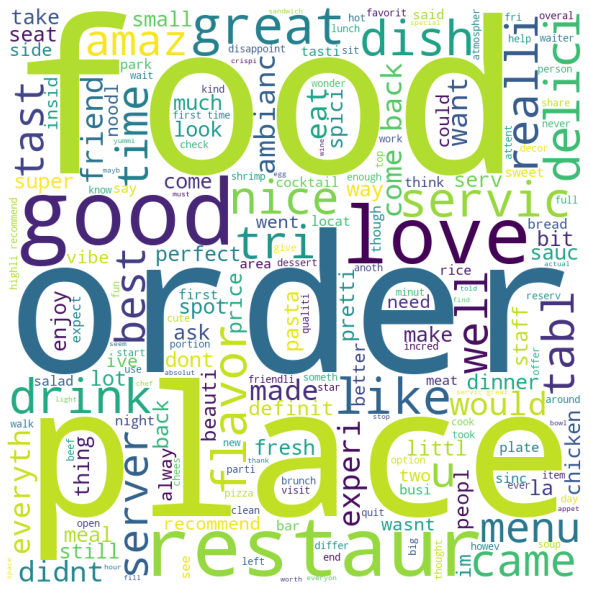

In [41]:
text = " ".join(x for x in data_text)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

+ Частотность слов после преобразований

Векторизация текста

In [42]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, min_df=5)
data_vectorized = vectorizer.fit_transform(data_text)
data_toconcat = pd.DataFrame.sparse.from_spmatrix(data_vectorized)

data_toconcat.shape

(2371, 2198)

Добавление к исходной таблице полученных векторов

In [43]:
data = pd.concat((data, data_toconcat), axis=1)
data

CommentDate                                            Comment  \
0          738779  Great ambiance indoors and attentive staff. Re...   
1          738778  Wrong wrong wrong.   AIf you don't fit the Ty ...   
2          738770  Bad service!! The worst servers. Marcos the ma...   
3          738769  One of my absolute favorite places in WeHo for...   
4          738768  Always a good experience and food is great.Tea...   
...           ...                                                ...   
2366       738698  Amazing beef burgers, chickens sandwiches, sid...   
2367       738678  I had these on a pop-up location - really amaz...   
2368       738669  Absolute best hamburger I've ever had. Friendl...   
2369       738660  I LOVE LOVE HOUR. Might get the logo tatted on...   
2370       738651  This easily became my new favorite burger join...   

      StarRating  $$  $$$  $$$$   Food Stands   Kebab   Wraps   Fast Food  \
0            4.4   1    0     0             0       0       0           0   
1            4.4   1    0     0             0       0       0           0   
2            4.4   1    0     0             0       0       0           0   
3            4.4   1    0     0             0       0       0           0   
4            4.4   1    0     0             0       0       0           0   
...          ...  ..  ...   ...           ...     ...     ...         ...   
2366         4.8   1    0     0             1       0       0           0   
2367         4.8   1    0     0             1       0       0           0   
2368         4.8   1    0     0             1       0       0           0   
2369         4.8   1    0     0             1       0       0           0   
2370         4.8   1    0     0             1       0       0           0   

      ...  2188  2189      2190  2191  2192  2193  2194  2195  2196  2197  
0     ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1     ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2     ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3     ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4     ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...   ...   ...   ...       ...   ...   ...   ...   ...   ...   ...   ...  
2366  ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2367  ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2368  ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2369  ...   0.0   0.0  0.090448   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2370  ...   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[2371 rows x 2337 columns]

Удаление комментариев

In [44]:
data = data.drop(["Comment"], axis=1)
data

CommentDate  StarRating  $$  $$$  $$$$   Food Stands   Kebab   Wraps  \
0          738779         4.4   1    0     0             0       0       0   
1          738778         4.4   1    0     0             0       0       0   
2          738770         4.4   1    0     0             0       0       0   
3          738769         4.4   1    0     0             0       0       0   
4          738768         4.4   1    0     0             0       0       0   
...           ...         ...  ..  ...   ...           ...     ...     ...   
2366       738698         4.8   1    0     0             1       0       0   
2367       738678         4.8   1    0     0             1       0       0   
2368       738669         4.8   1    0     0             1       0       0   
2369       738660         4.8   1    0     0             1       0       0   
2370       738651         4.8   1    0     0             1       0       0   

       Fast Food   Middle Eastern  ...  2188  2189      2190  2191  2192  \
0              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
1              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
2              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
3              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
4              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
...          ...              ...  ...   ...   ...       ...   ...   ...   
2366           0                0  ...   0.0   0.0  0.000000   0.0   0.0   
2367           0                0  ...   0.0   0.0  0.000000   0.0   0.0   
2368           0                0  ...   0.0   0.0  0.000000   0.0   0.0   
2369           0                0  ...   0.0   0.0  0.090448   0.0   0.0   
2370           0                0  ...   0.0   0.0  0.000000   0.0   0.0   

      2193  2194  2195  2196  2197  
0      0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...  
2366   0.0   0.0   0.0   0.0   0.0  
2367   0.0   0.0   0.0   0.0   0.0  
2368   0.0   0.0   0.0   0.0   0.0  
2369   0.0   0.0   0.0   0.0   0.0  
2370   0.0   0.0   0.0   0.0   0.0  

[2371 rows x 2336 columns]

Выполним стандартизацию количественных признаков, для того чтобы сделать значения более сравнимыми между собой и более мелкими (с такими алгоритмам минимизации проще работать)

In [45]:
data

CommentDate  StarRating  $$  $$$  $$$$   Food Stands   Kebab   Wraps  \
0          738779         4.4   1    0     0             0       0       0   
1          738778         4.4   1    0     0             0       0       0   
2          738770         4.4   1    0     0             0       0       0   
3          738769         4.4   1    0     0             0       0       0   
4          738768         4.4   1    0     0             0       0       0   
...           ...         ...  ..  ...   ...           ...     ...     ...   
2366       738698         4.8   1    0     0             1       0       0   
2367       738678         4.8   1    0     0             1       0       0   
2368       738669         4.8   1    0     0             1       0       0   
2369       738660         4.8   1    0     0             1       0       0   
2370       738651         4.8   1    0     0             1       0       0   

       Fast Food   Middle Eastern  ...  2188  2189      2190  2191  2192  \
0              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
1              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
2              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
3              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
4              0                0  ...   0.0   0.0  0.000000   0.0   0.0   
...          ...              ...  ...   ...   ...       ...   ...   ...   
2366           0                0  ...   0.0   0.0  0.000000   0.0   0.0   
2367           0                0  ...   0.0   0.0  0.000000   0.0   0.0   
2368           0                0  ...   0.0   0.0  0.000000   0.0   0.0   
2369           0                0  ...   0.0   0.0  0.090448   0.0   0.0   
2370           0                0  ...   0.0   0.0  0.000000   0.0   0.0   

      2193  2194  2195  2196  2197  
0      0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...  
2366   0.0   0.0   0.0   0.0   0.0  
2367   0.0   0.0   0.0   0.0   0.0  
2368   0.0   0.0   0.0   0.0   0.0  
2369   0.0   0.0   0.0   0.0   0.0  
2370   0.0   0.0   0.0   0.0   0.0  

[2371 rows x 2336 columns]

Но, так как часть данных хранится в sparce типе, то над такими данными выполнить стандартизацию простым способом не получится. Поэтому выполним ее только над двумя признаками `CommentDate` и `StarRating`

In [46]:
columns = ["CommentDate", "StarRating"] #, "$$", "$$$", "$$$$"] + list(styles)
data[columns] = (data[columns] - data[columns].mean(axis=0))/data[columns].std(axis=0)
print(columns)
data[columns].describe()

['CommentDate', 'StarRating']


CommentDate    StarRating
count  2.371000e+03  2.371000e+03
mean   3.390287e-13 -8.271185e-16
std    1.000000e+00  1.000000e+00
min   -2.751360e+01 -2.574419e+00
25%    5.763093e-02 -6.497943e-01
50%    1.641085e-01 -8.252645e-03
75%    2.028276e-01  6.332890e-01
max    2.479999e-01  2.237143e+00

## 6. Разбиение данных на обучающую и тестовую выборки

Произведем разбиение в соотношении 70/30

In [47]:
X = data.drop("StarRating", axis=1)
y = data["StarRating"]
X.shape, y.shape

((2371, 2335), (2371,))

In [48]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1659, 2335), (712, 2335), (1659,), (712,))

## 7. Метод k-ближайших соседей

In [50]:
from sklearn.neighbors import KNeighborsRegressor

kNN = KNeighborsRegressor(n_neighbors=10)
kNN.fit(X_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

## 9. Вычисление ошибок на обучающей и тестовой выборках

Ошибка на обучающей выборке:

In [51]:
y_train_prediction = kNN.predict(X_train)
err_train = 1 - kNN.score(X_train, y_train)
err_train

0.20521620643406357

Ошибка на тестовой выборке:

In [52]:
y_test_prediction = kNN.predict(X_test)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.3312407939422328

Ошибка на тестовой выборке значительно больше. Подберем оптимальное значение параметра количества соседей

## 8. Подбор оптимального количества ближайших соседей

In [166]:
# 17 sec
from sklearn.model_selection import GridSearchCV
nnb = [i for i in range(1, 50)]
knn = KNeighborsRegressor(n_neighbors=10)

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err_knn = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err_knn, best_n_neighbors

(0.10599395662949751, 2)

In [167]:
# график полученных метрик в зависимости от гиперпараметров модели
def plot_gridsearch(grid, params, inverse=False):
    results = grid.cv_results_
    scores_mean = results['mean_test_score']

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=params, y= 1 - scores_mean)
    sns.scatterplot(x=params, y= 1 - scores_mean)
    plt.xlabel('n_neighbors')
    plt.ylabel('error')
    plt.title('Error vs n_neighbors')
    if (inverse):
        plt.gca().invert_xaxis()
    plt.show()

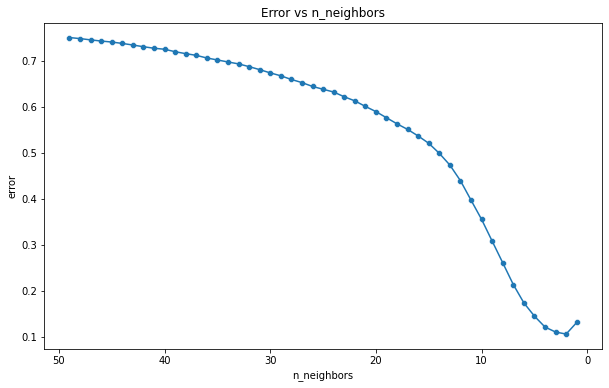

In [169]:
plot_gridsearch(grid, nnb, inverse=True)

**Вывод:** Лучший результат модель показывает при количестве соседей равном 2, что говорит о том, что для предсказания необходима сложная модель

## 10. Запуск других регрессоров

Random Forest Regression

In [204]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=25, max_depth=10, random_state=1)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=25, random_state=1)

Ошибки на тренировочных и тестовых данных

In [205]:
y_train_prediction = forest.predict(X_train)
err_train = 1 - forest.score(X_train, y_train)
err_train

0.39382659801901787

In [206]:
y_test_prediction = forest.predict(X_test)
err_test = 1 - forest.score(X_test, y_test)
err_test

0.47784876433900425

Подбор оптимальной глубины деревьев

In [208]:
# 12min
from sklearn.model_selection import GridSearchCV
depths = [5, 20, 35, 50, 65, 80, 95]
forest = RandomForestRegressor(n_estimators=25, max_depth=5, random_state=1)

grid = GridSearchCV(forest, param_grid = {'max_depth': depths}, cv=10)
grid.fit(X_train, y_train)

best_cv_err_forest = 1 - grid.best_score_
best_max_depth = grid.best_estimator_.max_depth
best_cv_err_forest, best_max_depth

(0.34395434161056304, 80)

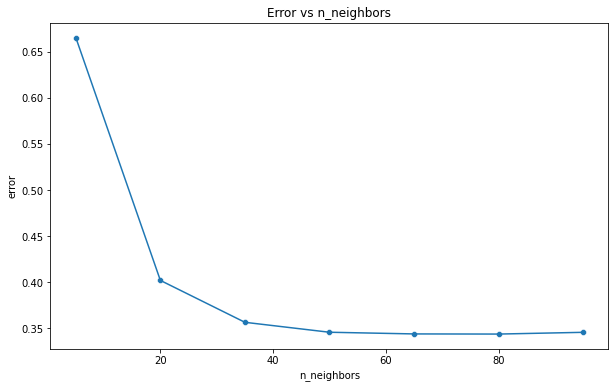

In [209]:
plot_gridsearch(grid, depths)

Лучшим параметром глубины является 80. Однако, количество estimators было выбрано всего 25 для ускорения подсчетов. Вероятно, что увеличение их количества даст прирост точности модели. Но имеем, что имеем

Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_

array([-0.00502625,  0.0638967 , -0.69548234, ...,  1.49137515,
       -0.90315652, -1.977079  ])

Ошибки на тренировочных и тестовых данных

In [182]:
y_train_prediction = lr.predict(X_train)
err_train = 1 - lr.score(X_train, y_train)
err_train

0.0

In [188]:
y_test_prediction = lr.predict(X_test)
err_test = (1 - lr.score(X_test, y_test)) % 1
err_test

0.15777846419450325

In [191]:
best_cv_err_lr = err_test

In [210]:
best_cv_err = pd.DataFrame({
    "model name": ["KNeighborsRegressor",
                   "RandomForestRegressor",
                   "LinearRegression"],
    "mean error": [best_cv_err_knn,
                   best_cv_err_forest,
                   best_cv_err_lr],
    "best param value": ["n_neighbors = "+str(best_n_neighbors),
                         "max_depth = "+str(best_max_depth),
                         "-"]})

best_cv_err

model name  mean error best param value
0    KNeighborsRegressor    0.105994  n_neighbors = 2
1  RandomForestRegressor    0.343954   max_depth = 80
2       LinearRegression    0.157778                -

+ Так как задача - задача регрессии, то несбалансированности классов нет
+ Ранее, мы рассматривали матрицу корреляции исходных данных. Там корреляции между признаками не было. В текущих данных обнаружить значимую корреляцию довольно сложно из-за огромного количества признаков. Следовательно, поборосться с мультиколинеарностью признаков трудная задача. Ей заниматься не будем

## 13. Общий вывод

# **Общий вывод**:

В данной работе мы познакомились с датасетом `Top 240 Recommended Restaurants in L.A. 2023`, собранным одним иностранным исследователем методом скреппинга интернет ресурсов. Мы выяснили некоторые интересные подробности о ресторанах, их рейтингах и поведении людей в их отношении. Нашли и разрешили проблему наличия пропущенных значений. Провели подготовку данных для обучения: векторизацию методом OneHot категориальных признаков. Признак `Style` закодировали по схожей схеме. Выполнили преобработку комментариев, удалив пукнтуцию, произведя стемминг и векторизацию. Так же выполнили стандартизацию количественных признаков. Успешно обучили модели kNN, RandomForest и Linear Regression. Лучшим оказалась модель ближайших соседей с гиперпараметром кол-ва соседей 2, что является довольно сложной моделью.

По нашей оценке результат работы модели является удовлетворительм. С одной стороны точность ее работы является довольно низкой, но с другой стороны, для в подобной задаче она является допустимой, ведь небольшая ошибка в оценке рейтинга заведения не является чем-то страшным, в то же время, сама по себе оценка носит субъективный характер: тот факт, что что-то нравится большинству не означает, что оно нравится всем.